In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
import tqdm

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


# 这个代码的目标是研究policy为0.2时，对应的action value是如何的，虽然没有收敛到最优解

In [3]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]

In [4]:
action_values = np.random.rand(25,5)
learning_rate = 0.01
gamma = 0.99

  0%|          | 0/100 [00:00<?, ?it/s]

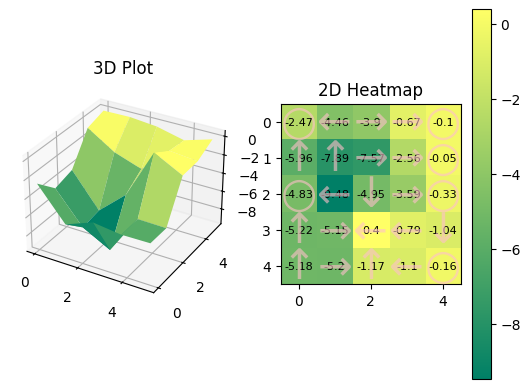

 16%|█▌        | 16/100 [00:00<00:02, 37.94it/s]

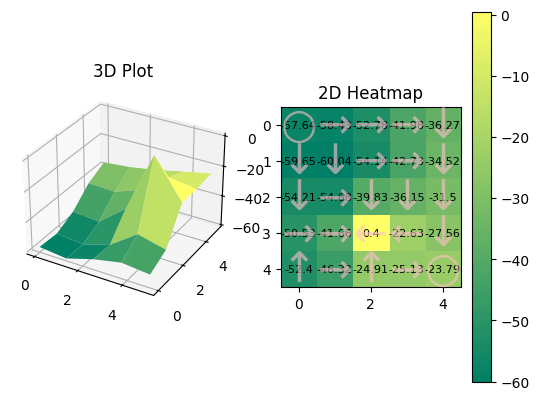

 36%|███▌      | 36/100 [00:01<00:01, 39.30it/s]

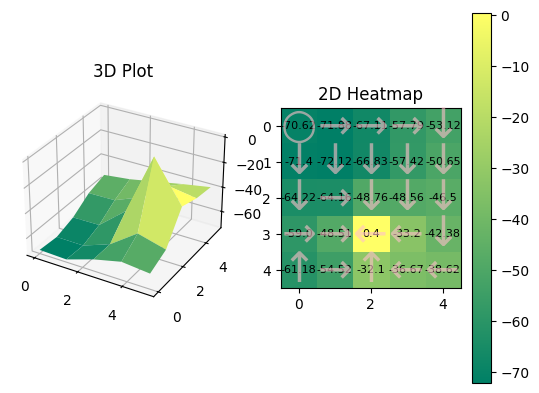

 56%|█████▌    | 56/100 [00:01<00:01, 38.54it/s]

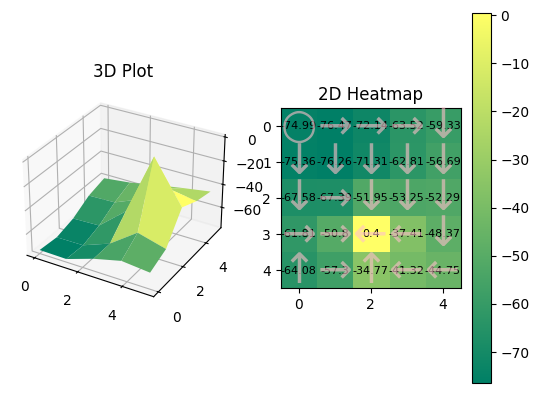

 76%|███████▌  | 76/100 [00:02<00:00, 39.66it/s]

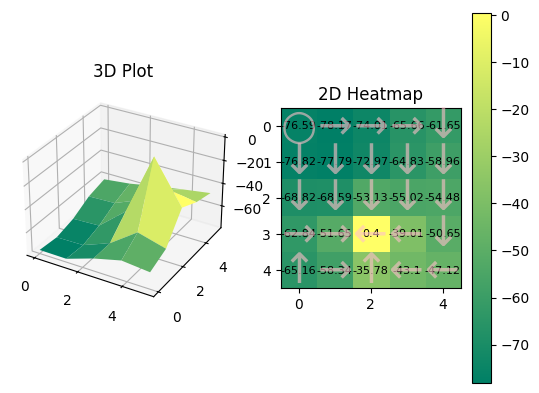

100%|██████████| 100/100 [00:02<00:00, 33.74it/s]


In [5]:
# 外层循环，使用tqdm库显示进度条，循环100次
for _ in tqdm.tqdm(range(100)):
    # 遍历每一个episode
    for i in range(len(episodes)):
        # 从后往前遍历当前episode中的每一个轨迹
        for j in range(len(episodes[i])-1,-1,-1):
            # 获取当前轨迹
            trajectory = episodes[i][j]
            # 解包轨迹中的各个元素
            tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
            
            # 获取下一个状态和动作对应的动作价值
            next_action_value = action_values[nextState][nextAction]
            # 计算目标值，使用贝尔曼方程更新目标
            target = tmpscore + (1.0 - terminal) * gamma * next_action_value
            
            # 计算时间差分（TD）误差
            TD_error = action_values[tmpstate][tmpaction] - target
            # 根据TD误差更新动作价值
            action_values[tmpstate][tmpaction] -= learning_rate * TD_error
    # 每20次外层循环执行一次以下操作
    if _ % 20 == 0:
        # 根据策略和动作价值计算状态价值
        state_values = np.sum(policy * action_values,axis=1)
        # 获取每个状态下具有最大动作价值的动作索引
        p = np.argmax(action_values,axis=1)
        # 绘制状态价值和最优动作
        draw(state_values.reshape(5,5), p)